<a href="https://colab.research.google.com/github/kumarpt20231231/kumarpt20231231/blob/main/Potential%2BCustomers%2BPrediction_kpt_03252024_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [74]:
#mount my google File
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
#import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots

# Importing the other functions we may require from Scikit-Learn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import make_scorer
# Code to ignore warnings from function usage
import warnings;
warnings.simplefilter('ignore')

In [76]:
#import data set from mounted file system
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
dt = pd.read_csv('/content/drive/MyDrive/Learning Data /ExtraaLearn.csv')
# create a back up of data
dt_backup = dt.copy()

## Data Overview

- Analyse the imported data , its structure, organization and feature content

In [77]:
dt.shape

(4612, 15)

In [78]:
dt.dtypes

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

In [79]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [80]:
dt.head(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [81]:
dt.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


**Observations**                             

- There are 4,612 data elements in the sample
- There are 15 columns in the dataset
-The column 'ID' contains just indices without adding information, hence it can be removed from data
-The column 'status' is used as the target variable to see if the leads are converted to sales or not.
- So the dataset contains 13 features.
- Nine of them are categorical (objects) ( Excluding ID )
current_occupation
first_interaction
profile_completed
last_activity
print_media_type1
print_media_type2
digital_media
educational_channels
referral
- Three of then are Integer ( excluding Status which is our target variable)
website_visits
time_spent_on_website
status
- One of the columns is float
page_views_per_visit


## Data Sanity Check

- Analyse the imported data for unique values , nulls , zsros and negetive values

In [82]:
dt.duplicated().sum()

0

In [83]:
dt.duplicated().value_counts()

False    4612
dtype: int64

In [84]:
dt.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [85]:
# Check for zero values
zero_values_exist = (dt == 0).any().any()
print("Zero values exist:", zero_values_exist)

Zero values exist: True


In [86]:
# Count zero values
zero_values_count = (dt == 0).sum().sum()
print("Number of zero values:", zero_values_count)

Number of zero values: 3764


In [87]:
# Select only the numeric columns for the operation
numeric_dt = dt.select_dtypes(include=[np.number])

# Check for negative values in the numeric columns
negative_values_exist = (numeric_dt < 0).any().any()
print("Negative values exist in numeric columns:", negative_values_exist)


Negative values exist in numeric columns: False


In [88]:
dt.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations :**

- ID is an identifier which is unique for each customer and we can drop this column as it would not add any value to our analysis

- The columns with number of unique values less than equal to three are categorical

- The rest of the columns are continuous

- There is no null values in the data frame

- There is no missing value in the data frame


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [89]:
#get the description of the data prior to treatment
dt.describe(include=[np.number, 'object', 'category']).T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#nalyze features with o minimum value except status , our outcome variable
#website_visits
dt[dt['website_visits']==0].head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,EXT034,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
37,EXT038,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
54,EXT055,28,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
94,EXT095,49,Unemployed,Website,High,0,0,0.0,Email Activity,Yes,No,No,No,No,1
127,EXT128,54,Professional,Mobile App,High,0,0,0.0,Phone Activity,No,No,No,No,No,0


In [91]:
#time_spent-on_websites
dt[dt['time_spent_on_website']==0].head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,EXT034,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
37,EXT038,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
54,EXT055,28,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
94,EXT095,49,Unemployed,Website,High,0,0,0.0,Email Activity,Yes,No,No,No,No,1
127,EXT128,54,Professional,Mobile App,High,0,0,0.0,Phone Activity,No,No,No,No,No,0


In [92]:
#page_views_per_visit
dt[dt['page_views_per_visit']==0].head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,EXT034,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
37,EXT038,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
54,EXT055,28,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
94,EXT095,49,Unemployed,Website,High,0,0,0.0,Email Activity,Yes,No,No,No,No,1
127,EXT128,54,Professional,Mobile App,High,0,0,0.0,Phone Activity,No,No,No,No,No,0


In [93]:
#communication media used by people outside the website
dt[dt['time_spent_on_website']==0]['last_activity'].value_counts()

Email Activity    119
Phone Activity     55
Name: last_activity, dtype: int64

In [94]:
#communication media used by people includng werbsite
dt[dt['time_spent_on_website']>0]['last_activity'].value_counts()

Email Activity      2159
Phone Activity      1179
Website Activity    1100
Name: last_activity, dtype: int64

In [95]:
#conversion rate of people who never visited the website
dt[dt['time_spent_on_website']==0]['status'].value_counts()

0    142
1     32
Name: status, dtype: int64

In [96]:
#conbversion of people who spent time on the website
dt[dt['time_spent_on_website']>0]['status'].value_counts()

0    3093
1    1345
Name: status, dtype: int64

**Observation**

- There is a left skew on the distribution of ages (median is higher than mean), with at least 75% of visitors being 57 years old, close to the maximum of 63.

- There is a right skew on the distribution of website visits, with only 25% of visitors having visited more than five times, however the maximum number of visits is 30. Such elevated skewness suggests outliers.

- There is a right skew on time spent on the_website, with again the likelihood of outliers.

- There is a right skew as well on page views per visit. Again, with the same implication regarding outliers.
All numerical variables have elevated variance, which also warrants further analysis.

- Approximately 30% of all leads have converted to paying customers based on the status.

- Several variables have an unexpected minimum value of zero, including website_visits, time_spent_on_website and page_views_per_visit. This could affect the mean and the skew of the distributions.

- These leads, with no time spent on the website, are reported as having had a last activity via phone or email, and some of them have converted and have had their profile completed, presumably through interview.

- Small fraction of converted leads,have subscribed without visits to the website (32/1345 ~= 2.4% all converted leads).

- Conversion rates among leads with no time on the website is lower than the average (22.5% as opposed to 30% for the entire dataset).


**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [97]:
# analyze the status of conversion against current occupation to find how each feature affects lead status
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable ( status)
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(dt[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(dt[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Current occupation  vs lead outcome**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
----------------------------------------------------------------------------------------------------


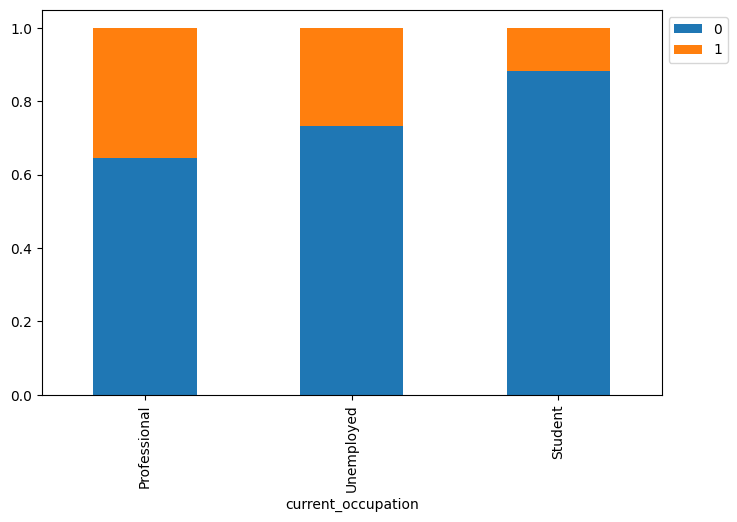

In [98]:
#current_occupation vs conversion status
stacked_barplot(dt, 'current_occupation', 'status')

**Observations:**

-The professional leads have the highest rate of conversion to sales.

-The student leads have the lowest rate of conversion to sales.

**First channels of interaction vs lead outcome**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
----------------------------------------------------------------------------------------------------


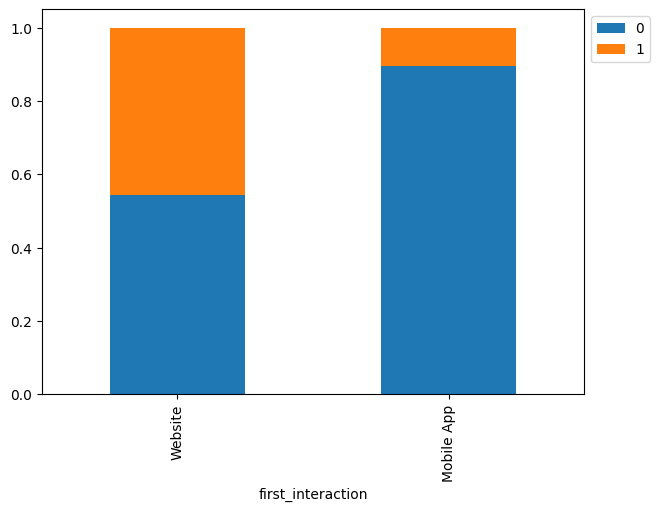

In [99]:
# first_interaction vs status
stacked_barplot(dt, 'first_interaction', 'status')

**Observations:**

- The mode of thefirst interaction certainly has a huge impact.

- The website interaction as the first contact has a much higher rate of conversion.

**Interaction mode with prospects vs lead outcome**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
----------------------------------------------------------------------------------------------------


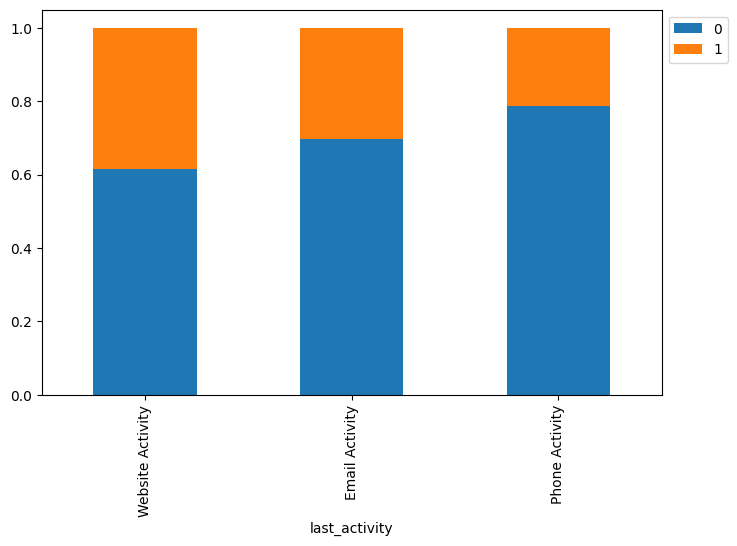

In [100]:
#last_activity vs status
stacked_barplot(dt, 'last_activity', 'status')

**Observations:**

- Interaction via website has the highest conversion rate(38%)

- Interaction via email has the conversion rate (30%)

- Interaction via phone has the lowest conversion rate (20%)

**Channel vs lead outcome**

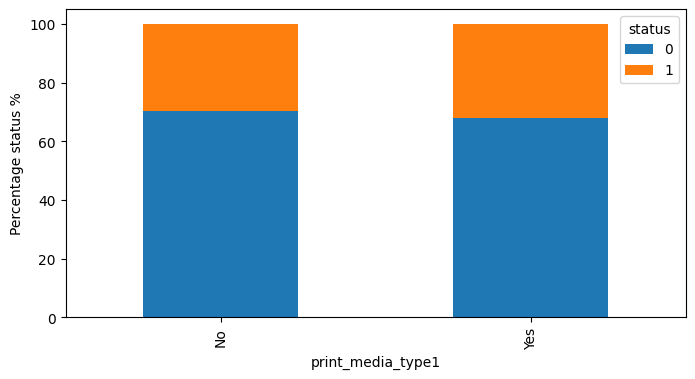

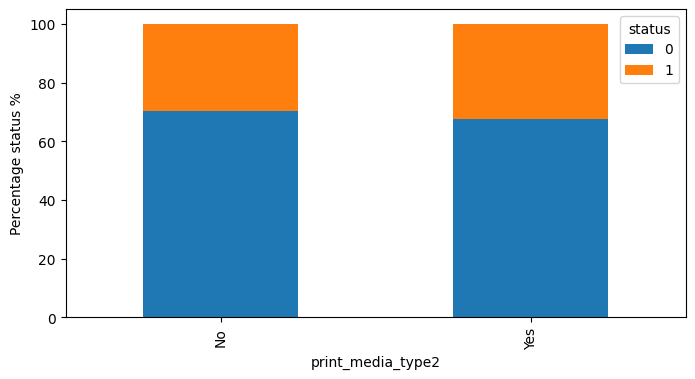

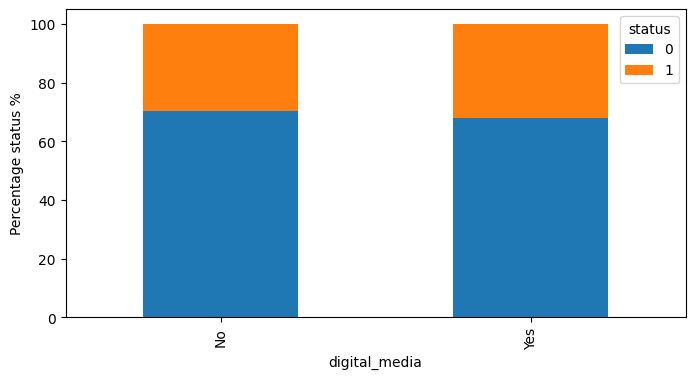

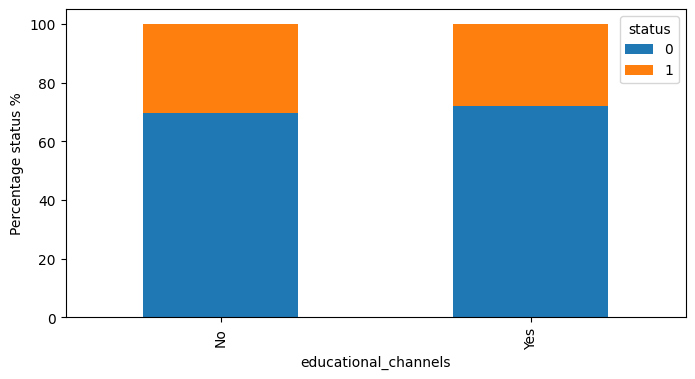

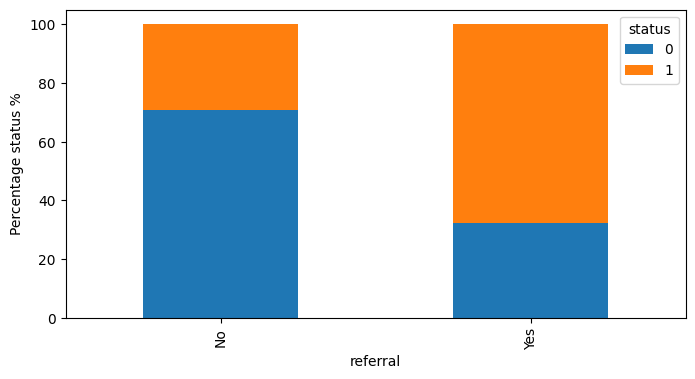

In [101]:
cat_cols = ['print_media_type1', 'print_media_type2','digital_media', 'educational_channels', 'referral', 'status']
for i in cat_cols:
    if i!='status':
        (pd.crosstab(dt[i],dt['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status %')

**Observations:**

- The leads from referrals have the highest conversion rate

**Compleate profile details about a prospect vs lead outcome**

<Axes: xlabel='profile_completed', ylabel='status'>

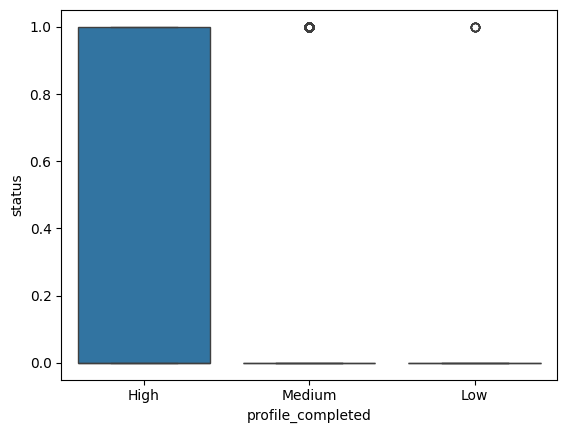

In [102]:
#profile_completed vs status
sns.boxplot(x= dt['profile_completed'], y=dt['status'])

**Observations:**

- The profiles compleated with quality data leades to  highest lead conversion rate

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [103]:
#missing value treatment
#N/A as there is no missing value

In [104]:
#feature engineering Part I
# drop the ID feature as this soes not add any value to our analyis
dt_clean_ID = dt.drop('ID', axis=1)
dt_clean_ID.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [105]:
#Run function univatiate analysis on the data frame after droping the ID to gain insights on each numerica column
num_count = dt_clean_ID.nunique()

# Creating numerical columns
num_col = num_count.index[num_count > 3].tolist()

# Creating categorical variables
cat_col = num_count.index[num_count < 4].tolist()

# Printing number of count of each unique value in each column
for column in cat_col:
    print(dt_clean_ID[column].value_counts())
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

In [106]:
#let us check for duplicates again
dt_clean_ID.duplicated().sum()

14

In [107]:
#outlier detection and treatment
# We want to filter values based on the 90 percentile and exclude the outliers
q1 = dt_clean_ID["website_visits"].quantile(0.90)
q2 = dt_clean_ID["page_views_per_visit"].quantile(0.90)
print(q1, q2)

7.0 5.5139000000000005


In [108]:
#preperaing data for modeling
# Removing outliers
dt_clean_ID_prep = dt_clean_ID[dt_clean_ID['website_visits'] < q1]
dt_clean_ID_prep = dt_clean_ID[dt_clean_ID['website_visits'] < q2]

# Check the size of the feature engineered data.
print(dt_clean_ID_prep.shape)

(3715, 14)


**Observations:**

- The number of data points got reduced from 4,612 to 3,715.
- Strings are converted to integers ready for modeling

In [109]:
#feature engineering Part II
#encoding of categorical (string type) using get_dummies.
X=dt_clean_ID_prep.drop(columns='status')
Y=dt_clean_ID_prep['status']

# Converting strings to integers
X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

**Final Data preparation**

- converting data types of integer columns to float

In [110]:
#other preprocessing
#converting data types of integer columns to float
for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [111]:
# Let us check the data again after droping the ID feature
dt_clean_ID_prep.describe(include=[np.number, 'object', 'category']).T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3715.0,NaN,NaN,NaN,46.237954,13.135941,18.0,36.0,51.0,57.0,63.0
current_occupation,3715,3,Professional,2106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,3715,2,Website,2089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,3715,3,High,1818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,3715.0,NaN,NaN,NaN,2.482369,1.373022,0.0,1.5,2.0,3.0,5.0
time_spent_on_website,3715.0,NaN,NaN,NaN,713.462719,743.313143,0.0,121.0,372.0,1301.5,2531.0
page_views_per_visit,3715.0,NaN,NaN,NaN,3.015489,1.975781,0.0,2.074,2.804,3.7535,18.302
last_activity,3715,3,Email Activity,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,3715,2,No,3308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,3715,2,No,3534,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Univariate Analysis of Numeric Features*

In [112]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

age                               0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
current_occupation_Student        0
current_occupation_Unemployed     0
first_interaction_Website         0
profile_completed_Low             0
profile_completed_Medium          0
last_activity_Phone Activity      0
last_activity_Website Activity    0
print_media_type1_Yes             0
print_media_type2_Yes             0
digital_media_Yes                 0
educational_channels_Yes          0
referral_Yes                      0
dtype: int64
------------------------------
age                               0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
current_occupation_Student        0
current_occupation_Unemployed     0
first_interaction_Website         0
profile_completed_Low             0
profile_completed_Medium          0
last_activity_Phone Activity      0
last_activity_Websit

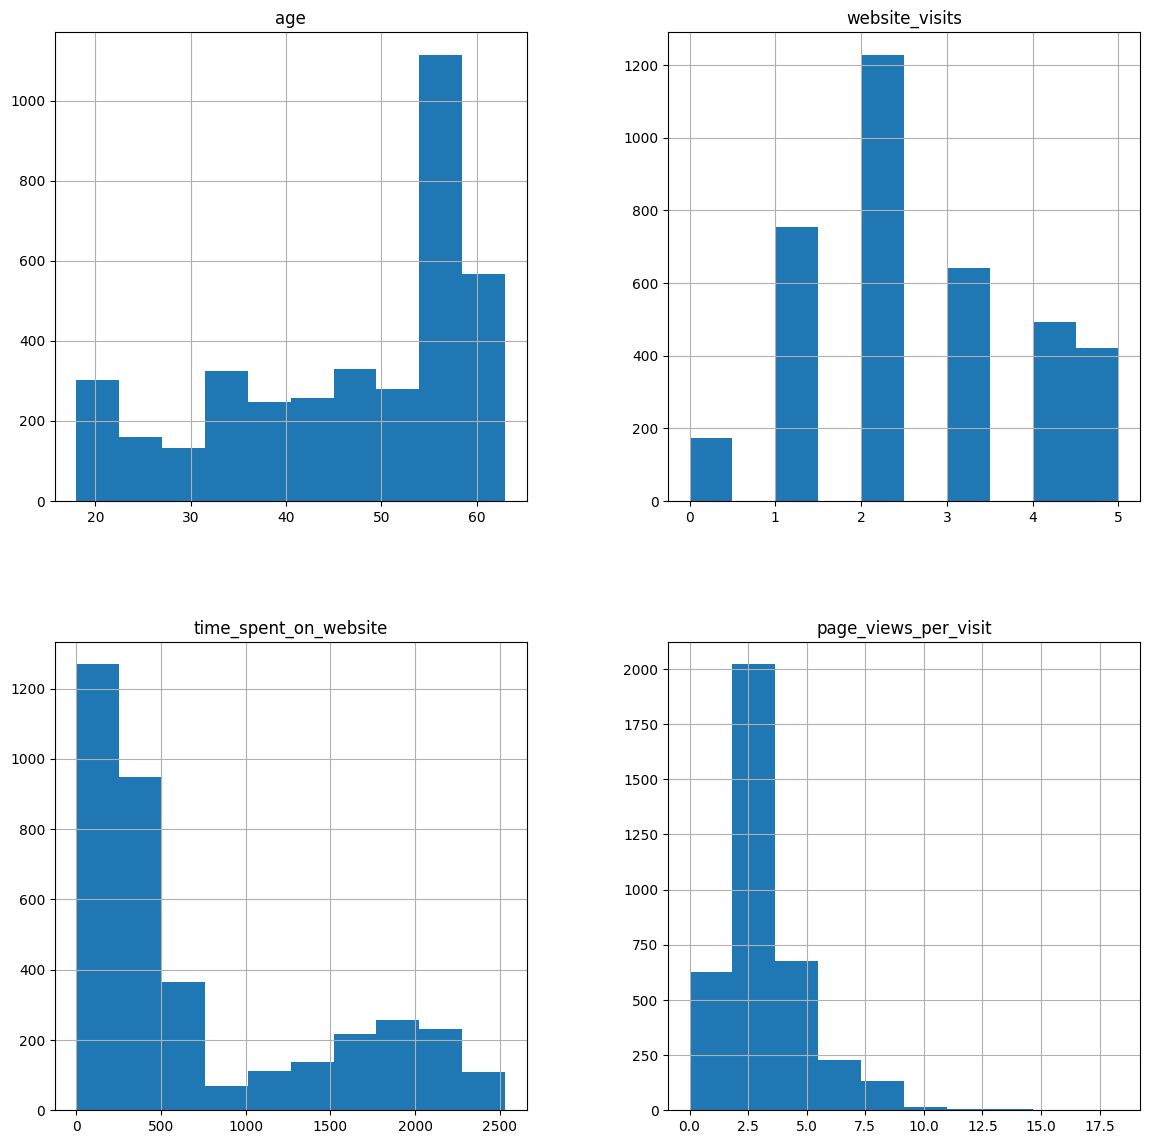

In [113]:
# Creating histograms on numeric data
dt_clean_ID_prep[num_col].hist(figsize=(14,14))
plt.show()

**Observations:**

- The age varies from 18 to 63 with the mean of 46 years old. The second quartile value is substantially higher than the mean at 51. This means that the students tend to be older.

- The mean number of visits is 3.57. There is a substantial difference between the third quartile value and the max value (5 vs 30). This means there are outliers including the max value.

- The page views per visit column has the same kind of substantial difference between the third quartile value and the max. The max value surely is an outlier.

- Highest number of conversions comes from the age group 54 ~ 58 (1390). The students around age 60 have the second highest frequency (700).

- Most of people visit the website less than 5 times. The number of visits more than 15 can be viewed as outliers.
Although most of the people spent less than 750 hours on the website, the higher numbers cannot be considered as outliers.

- People spend roughly 2 ~ 4 page views per visit. Anything more than 10 can be viewed as outliers.

*Univariate analysis for categorical variables*

In [114]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(dt_clean_ID_prep[i].value_counts(normalize=True))
    print('*'*40)

No     0.890444
Yes    0.109556
Name: print_media_type1, dtype: float64
****************************************
No     0.951279
Yes    0.048721
Name: print_media_type2, dtype: float64
****************************************
No     0.886406
Yes    0.113594
Name: digital_media, dtype: float64
****************************************
No     0.847376
Yes    0.152624
Name: educational_channels, dtype: float64
****************************************
No     0.98035
Yes    0.01965
Name: referral, dtype: float64
****************************************
0    0.699865
1    0.300135
Name: status, dtype: float64
****************************************


**Observations:**

Conversion of leades follow below observed charateristics

- Current occupation: Among the leads, professionals and unemployed are 49% each, while students are 12%.

- First interaction: There are more interactions via website at 55% than via mobile app.

- Profile completed: High and medium completion of profile constitute approximately 49% while low has only 2%. There is a high level of engagement.

- Last activity: Interactions are mainly done via email at almost 50%.

- Print media type1: 10% of the leads come from newspaper advertising.

- Print media type2: 15% of the leads come from magazine advertising. This is more effective than newspaper.

- Digital media: 11% of the leads come from digital media.
Educational channels: 15% of the leads come from these channels.

- Referral: Only 2% of the leads come from referrals.

*Multivariate Analysis*

<Axes: >

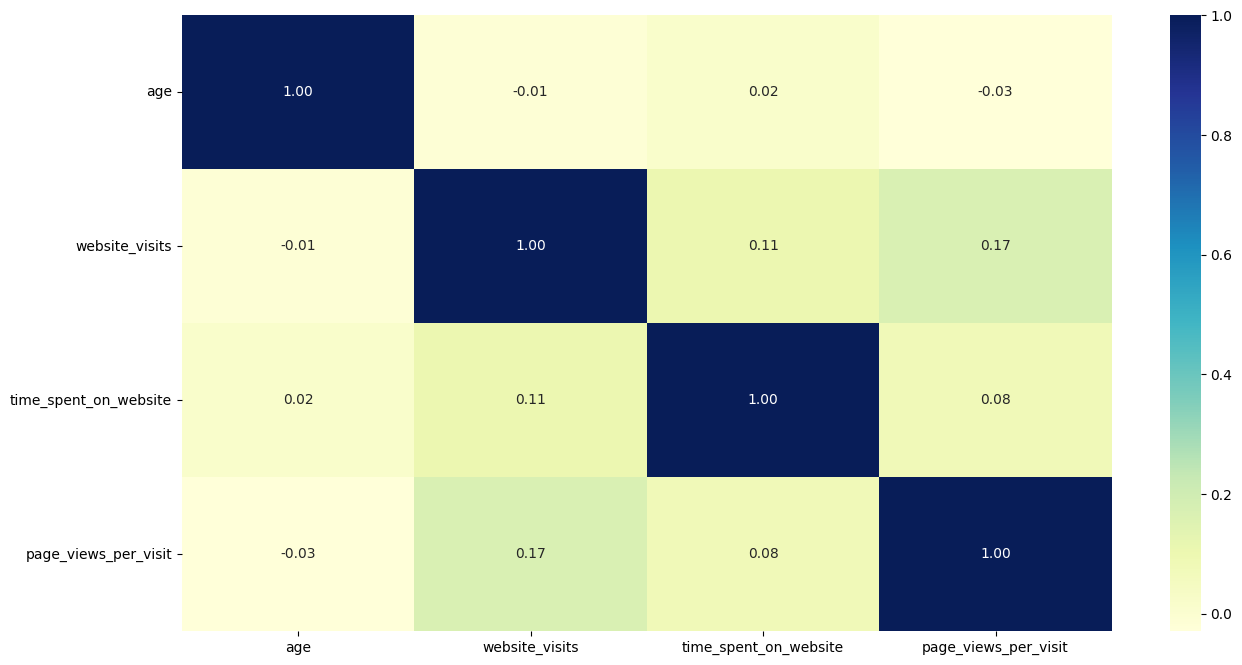

In [115]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(dt_clean_ID_prep[num_col].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- Very low correlations are observed among the numerical features. only time spent on the web page has some mild corelation to the lead out comes

**Build a Function to create the metric score**

In [116]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [117]:
# Building and fitting decision tree model
dtm = DecisionTreeClassifier(random_state = 1)
dtm.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



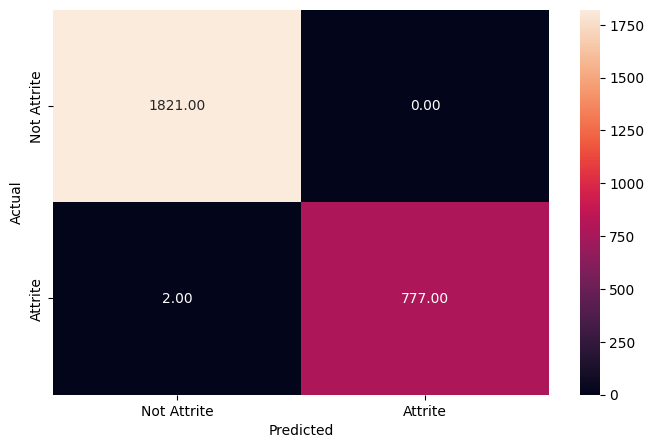

In [118]:
# validate performance on the training dataset
y_train_pred_dtm = dtm.predict(X_train)
metrics_score(y_train, y_train_pred_dtm)

***Observations:***

- Precision, recall and f1-score are 1. The model is overfitted to the train data. We need to check if pruning is needed, let us first use test data to validate, We know from the corr heat map only time spent on the website affects conversion.
- The random forest model is overfitting. All scores on the train set are equl to 1.

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       779
           1       0.66      0.68      0.67       336

    accuracy                           0.80      1115
   macro avg       0.76      0.76      0.76      1115
weighted avg       0.80      0.80      0.80      1115



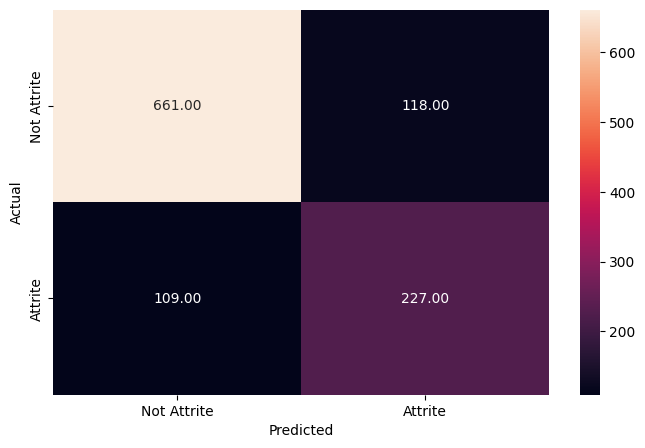

In [119]:
# Validating performance on the test dataset
y_test_pred_dtm = dtm.predict(X_test)
metrics_score(y_test, y_test_pred_dtm)

**Observation:**
- The scores on the test set are decent having a precision of 0.66 and recall of 0.68. This model gives slightly better results than the decision tree with default parameters.

## Do we need to prune the tree?

In [120]:
# Importance of features in the tree building

print (pd.DataFrame(dtm.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.250534
first_interaction_Website       0.196629
page_views_per_visit            0.138004
age                             0.107034
profile_completed_Medium        0.079665
website_visits                  0.043888
last_activity_Phone Activity    0.037361
current_occupation_Unemployed   0.034944
last_activity_Website Activity  0.023400
current_occupation_Student      0.019729
profile_completed_Low           0.017979
digital_media_Yes               0.015680
referral_Yes                    0.011850
educational_channels_Yes        0.009087
print_media_type1_Yes           0.007337
print_media_type2_Yes           0.006881


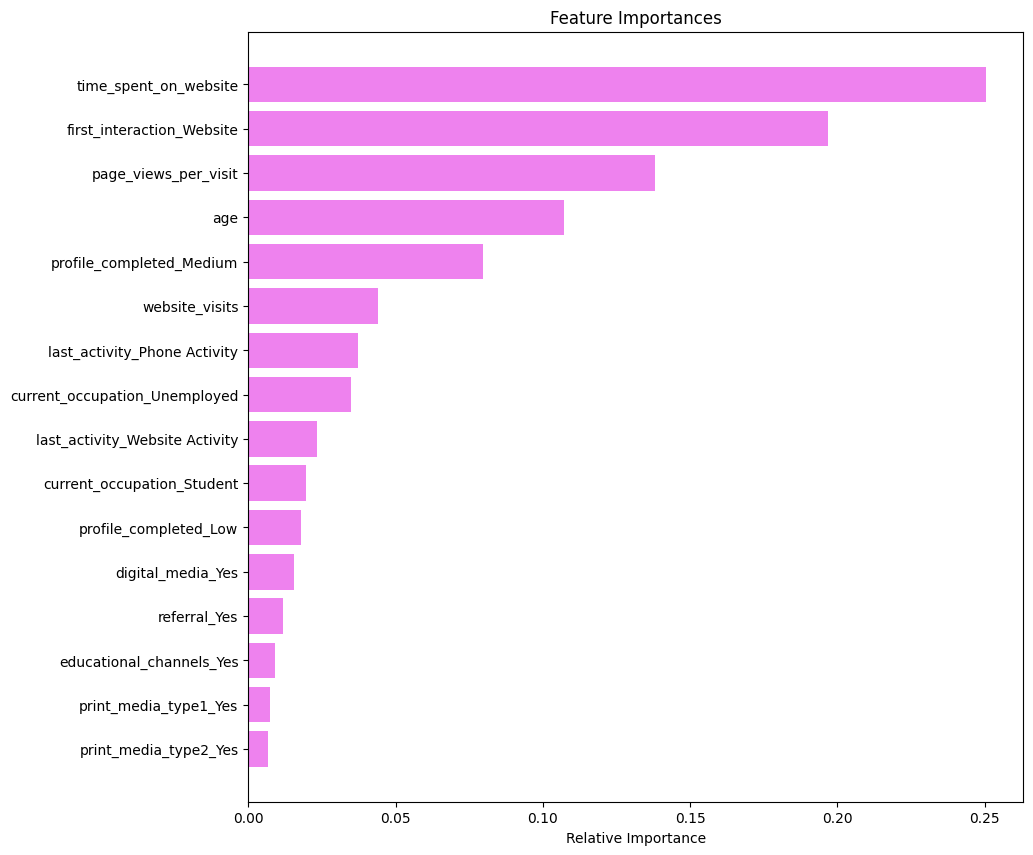

In [121]:
# Plotting the feature importance
features = list(X.columns)
importances = dtm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- All the features contribute with different degrees. Pruning may not benecesssary. Let us find a optimal model using Grid of Parameters and check.

In [122]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1821
           1       0.61      0.91      0.73       779

    accuracy                           0.80      2600
   macro avg       0.78      0.83      0.78      2600
weighted avg       0.85      0.80      0.81      2600



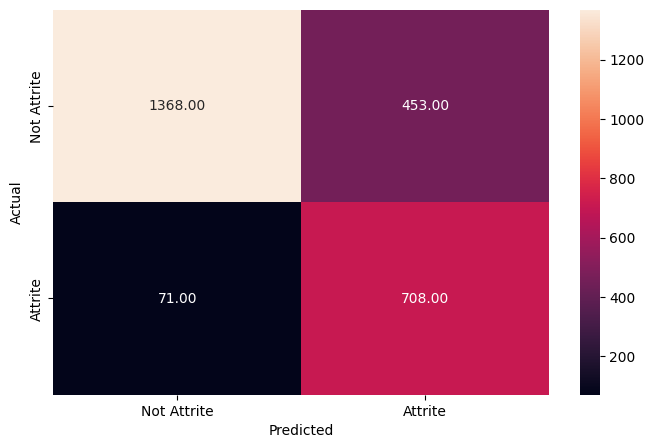

In [123]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       779
           1       0.58      0.90      0.70       336

    accuracy                           0.77      1115
   macro avg       0.76      0.81      0.76      1115
weighted avg       0.83      0.77      0.78      1115



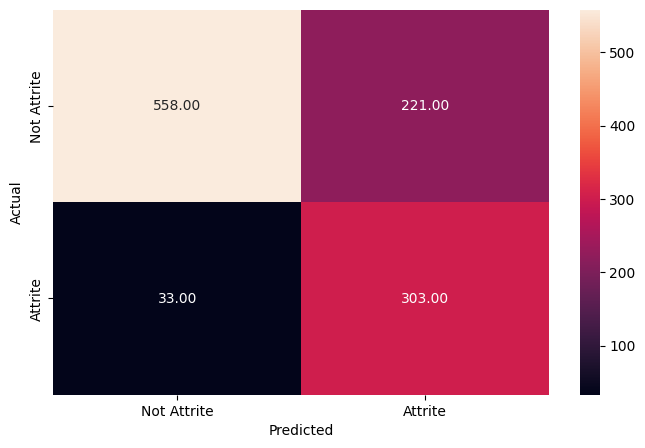

In [124]:
# Checking performance on the testing data
y_pred_test = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test)

In [125]:
# Importance of features in the tree building
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
first_interaction_Website       0.352552
time_spent_on_website           0.317987
profile_completed_Medium        0.268561
last_activity_Phone Activity    0.030567
last_activity_Website Activity  0.029226
age                             0.001107
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


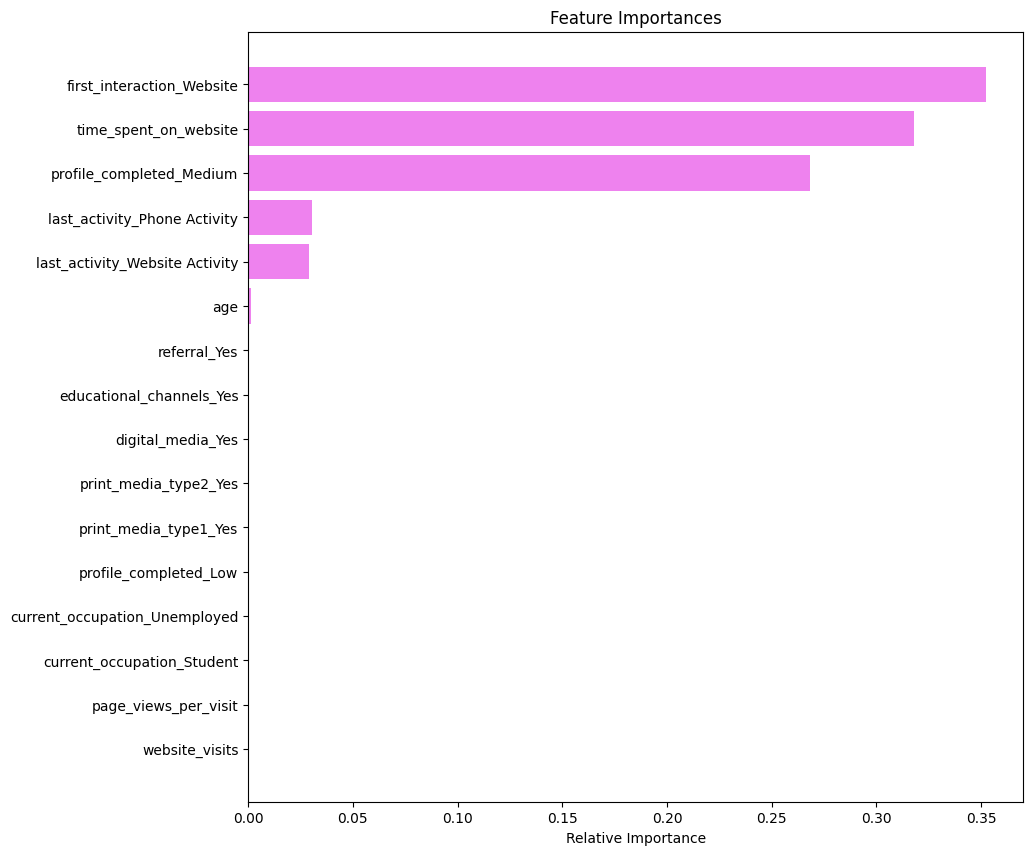

In [126]:
# Plotting the feature importance
features = list(X.columns)
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [127]:
X_pruned = dt_clean_ID_prep[['time_spent_on_website', 'first_interaction', 'profile_completed', 'last_activity', 'age']]

**Observations:**

- Only the features 'time_spent_on_website', 'first_interaction', 'profile_completed', 'last_activity', 'age' contribute to the model. We can prune the rest of the features.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



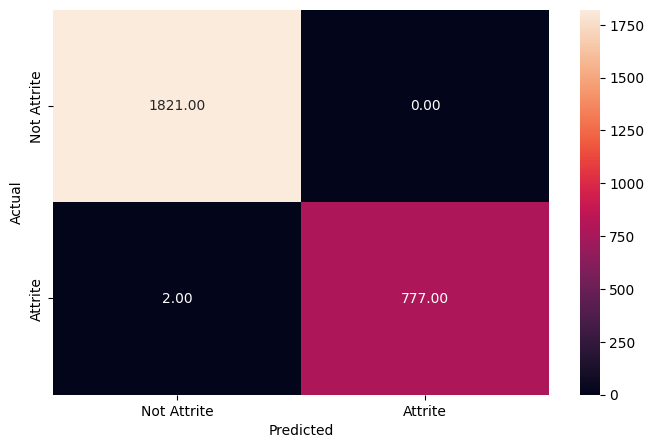

In [128]:
# Converting strings to integers
X_pruned = pd.get_dummies(X_pruned, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train_pruned, X_test_pruned, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)
# Building decision tree model
dtm_pruned = DecisionTreeClassifier(random_state = 1)
dtm_pruned.fit(X_train_pruned, y_train)
# Checking performance on the training dataset
y_train_pred_dtm = dtm_pruned.predict(X_train_pruned)

metrics_score(y_train, y_train_pred_dtm)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       779
           1       0.66      0.68      0.67       336

    accuracy                           0.80      1115
   macro avg       0.76      0.76      0.76      1115
weighted avg       0.80      0.80      0.80      1115



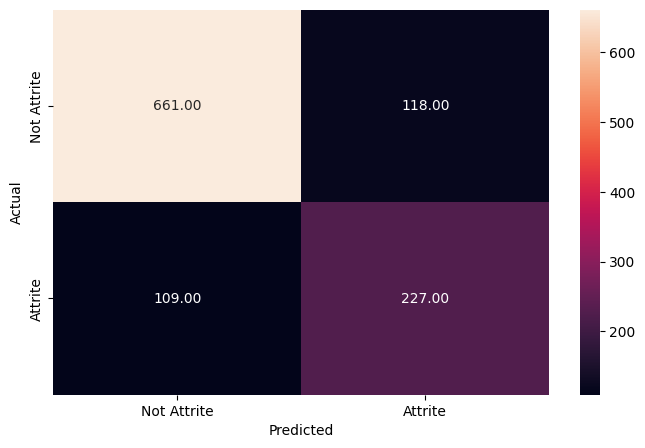

In [129]:
# Checking performance on the testing dataset
y_test_pred_dtm = dtm_pruned.predict(X_test_pruned)
metrics_score(y_test, y_test_pred_dtm)

**Observations:**

- Only 6 of the 13 features, the performance on the test set is better hence, pruning is a good idea.

## Building a Random Forest model

In [130]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



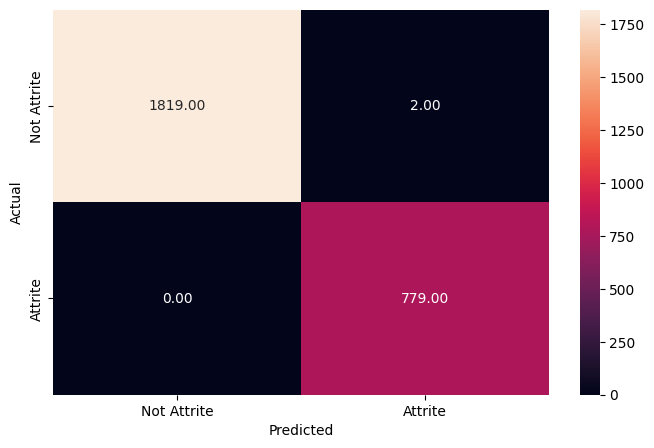

In [131]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       779
           1       0.81      0.71      0.75       336

    accuracy                           0.86      1115
   macro avg       0.84      0.82      0.83      1115
weighted avg       0.86      0.86      0.86      1115



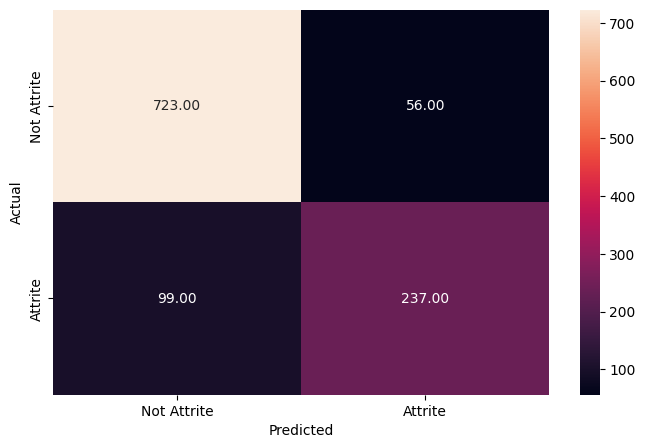

In [132]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

**Observations:**

- Precision, recall and F1 score are .81,.71,.75, So even with overfitting, Random Forest Classifier performs better than Decision Tree Classifier.

## Do we need to prune the tree?

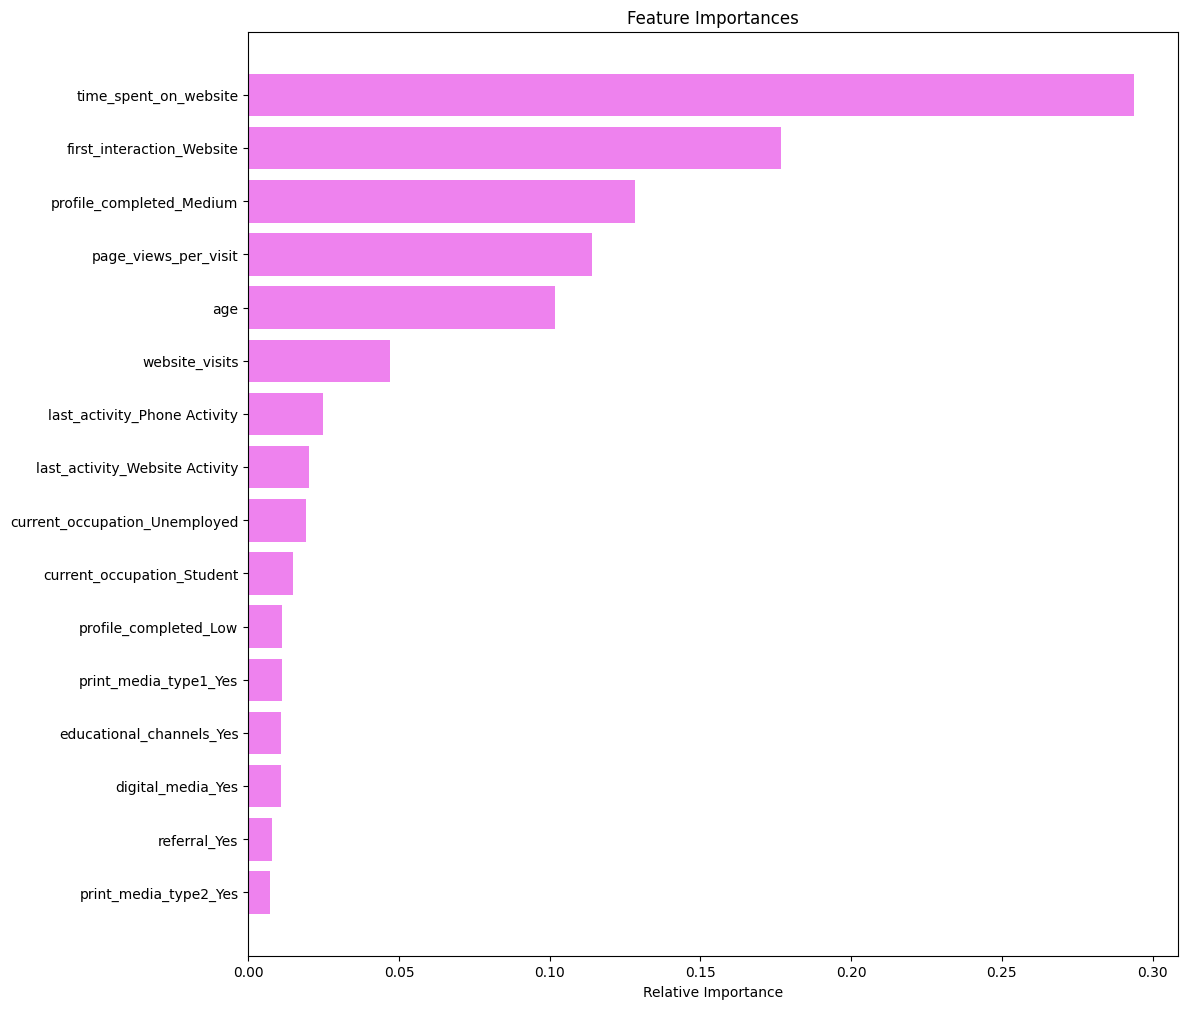

In [133]:
#plot the features importance
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- Most of all  the features contribute to the model

In [134]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1821
           1       0.67      0.88      0.76       779

    accuracy                           0.83      2600
   macro avg       0.80      0.85      0.82      2600
weighted avg       0.86      0.83      0.84      2600



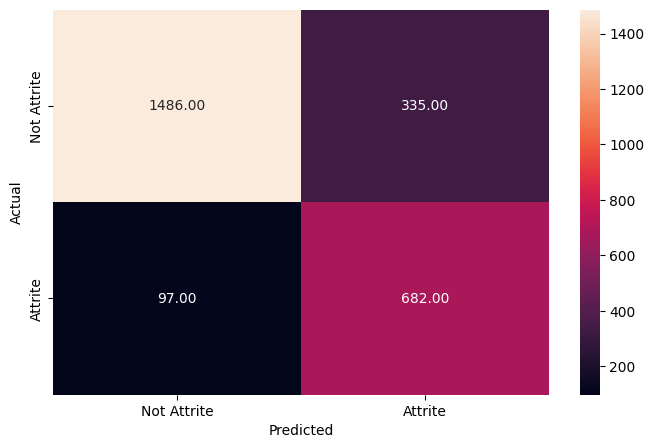

In [135]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)
# Checking performance on the training dataset
y_train_pred_dtm = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_dtm)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       779
           1       0.65      0.89      0.75       336

    accuracy                           0.82      1115
   macro avg       0.79      0.84      0.80      1115
weighted avg       0.85      0.82      0.83      1115



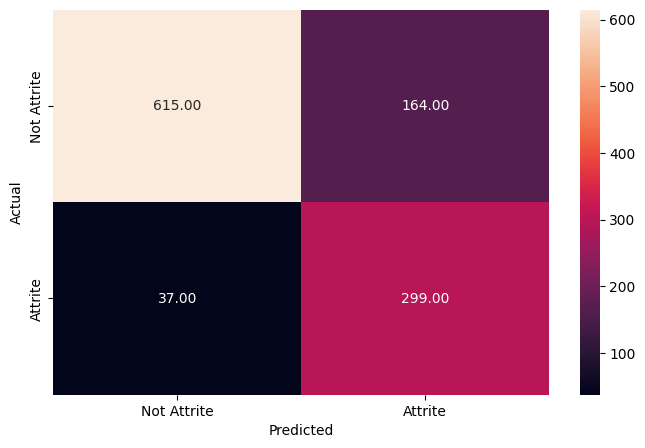

In [136]:
# Checking performance on the test dataset
y_test_pred_dt = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observations:**

- This classifier does not perform as well as the original one.

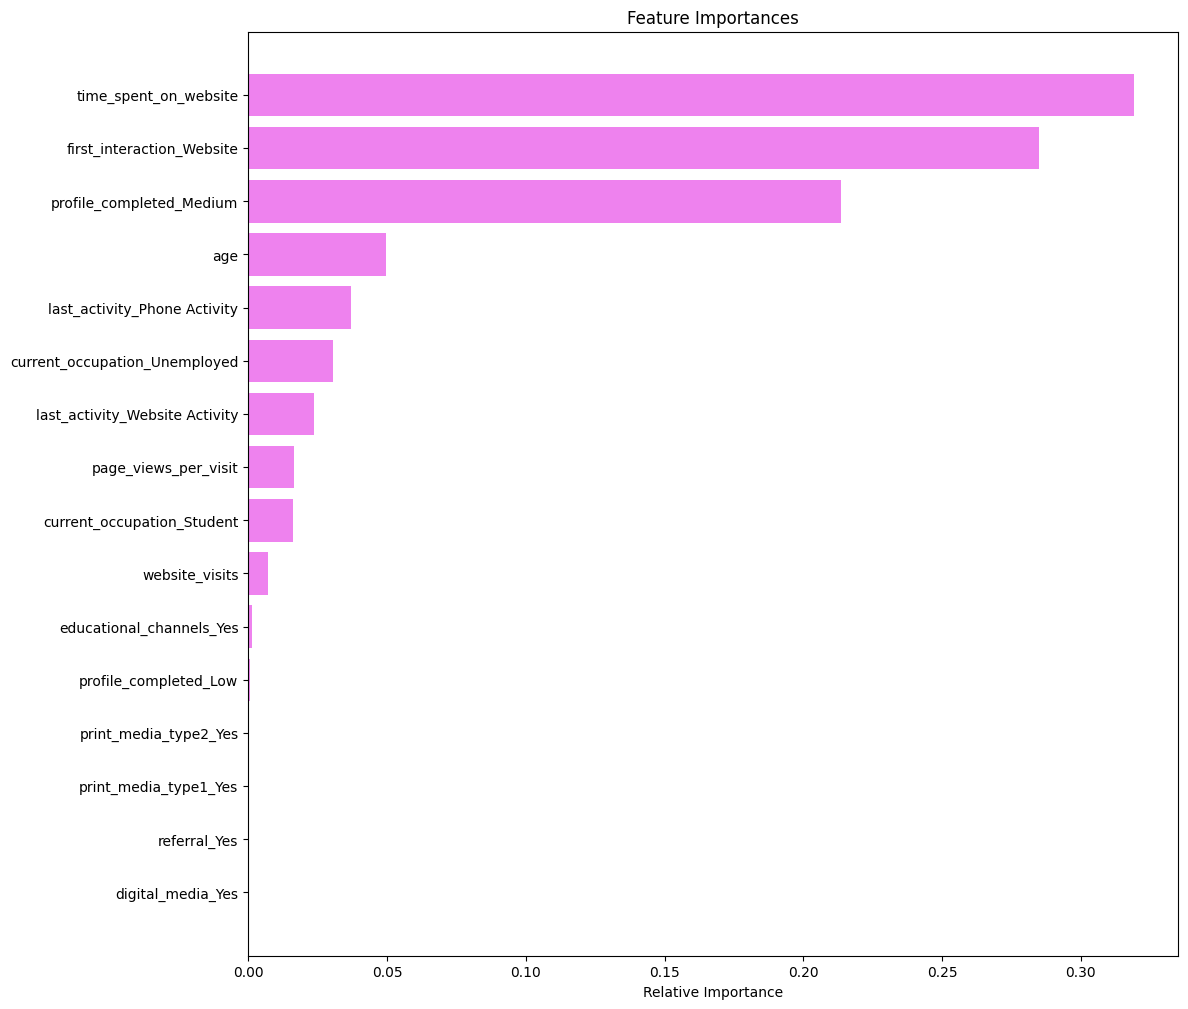

In [137]:
# Graphing feature importance of the model
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- Remove / Prune print media type1, print media type2, digital media, and referral as they do not contribute.

In [138]:
X_pruned_rf = dt_clean_ID_prep[['time_spent_on_website', 'first_interaction', 'profile_completed', 'age', 'current_occupation',
                  'last_activity', 'page_views_per_visit', 'website_visits', 'educational_channels']]
X.columns

Index(['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Phone Activity',
       'last_activity_Website Activity', 'print_media_type1_Yes', 'print_media_type2_Yes',
       'digital_media_Yes', 'educational_channels_Yes', 'referral_Yes'],
      dtype='object')

In [139]:
# Converting strings to integers
X_pruned_rf = pd.get_dummies(X_pruned_rf, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train_pruned_rf, X_test_pruned_rf, y_train, y_test = train_test_split(
    X_pruned_rf, Y, test_size=0.30, random_state=1
)
# Fitting the Random Forest classifier on the training data
rf_estimator_pruned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator_pruned.fit(X_train_pruned_rf, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



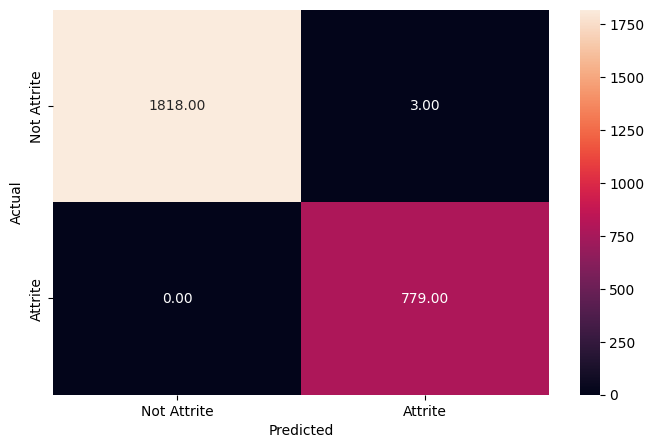

In [140]:
# Checking performance on the training dataset
y_train_pred = rf_estimator_pruned.predict(X_train_pruned_rf)
metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       779
           1       0.79      0.72      0.76       336

    accuracy                           0.86      1115
   macro avg       0.84      0.82      0.83      1115
weighted avg       0.86      0.86      0.86      1115



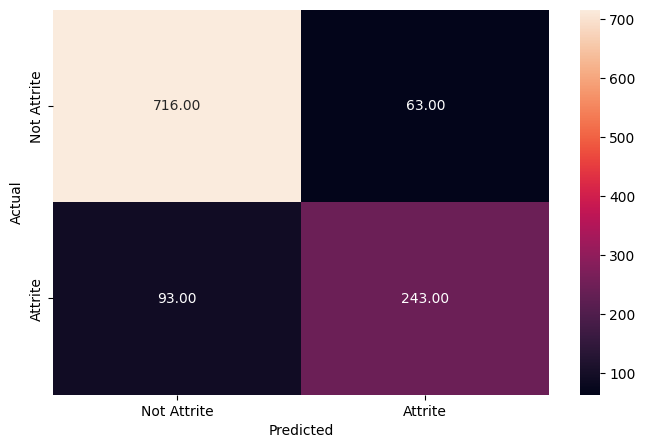

In [141]:
# Checking performance on the test dataset
y_test_pred = rf_estimator_pruned.predict(X_test_pruned_rf)
metrics_score(y_test, y_test_pred)

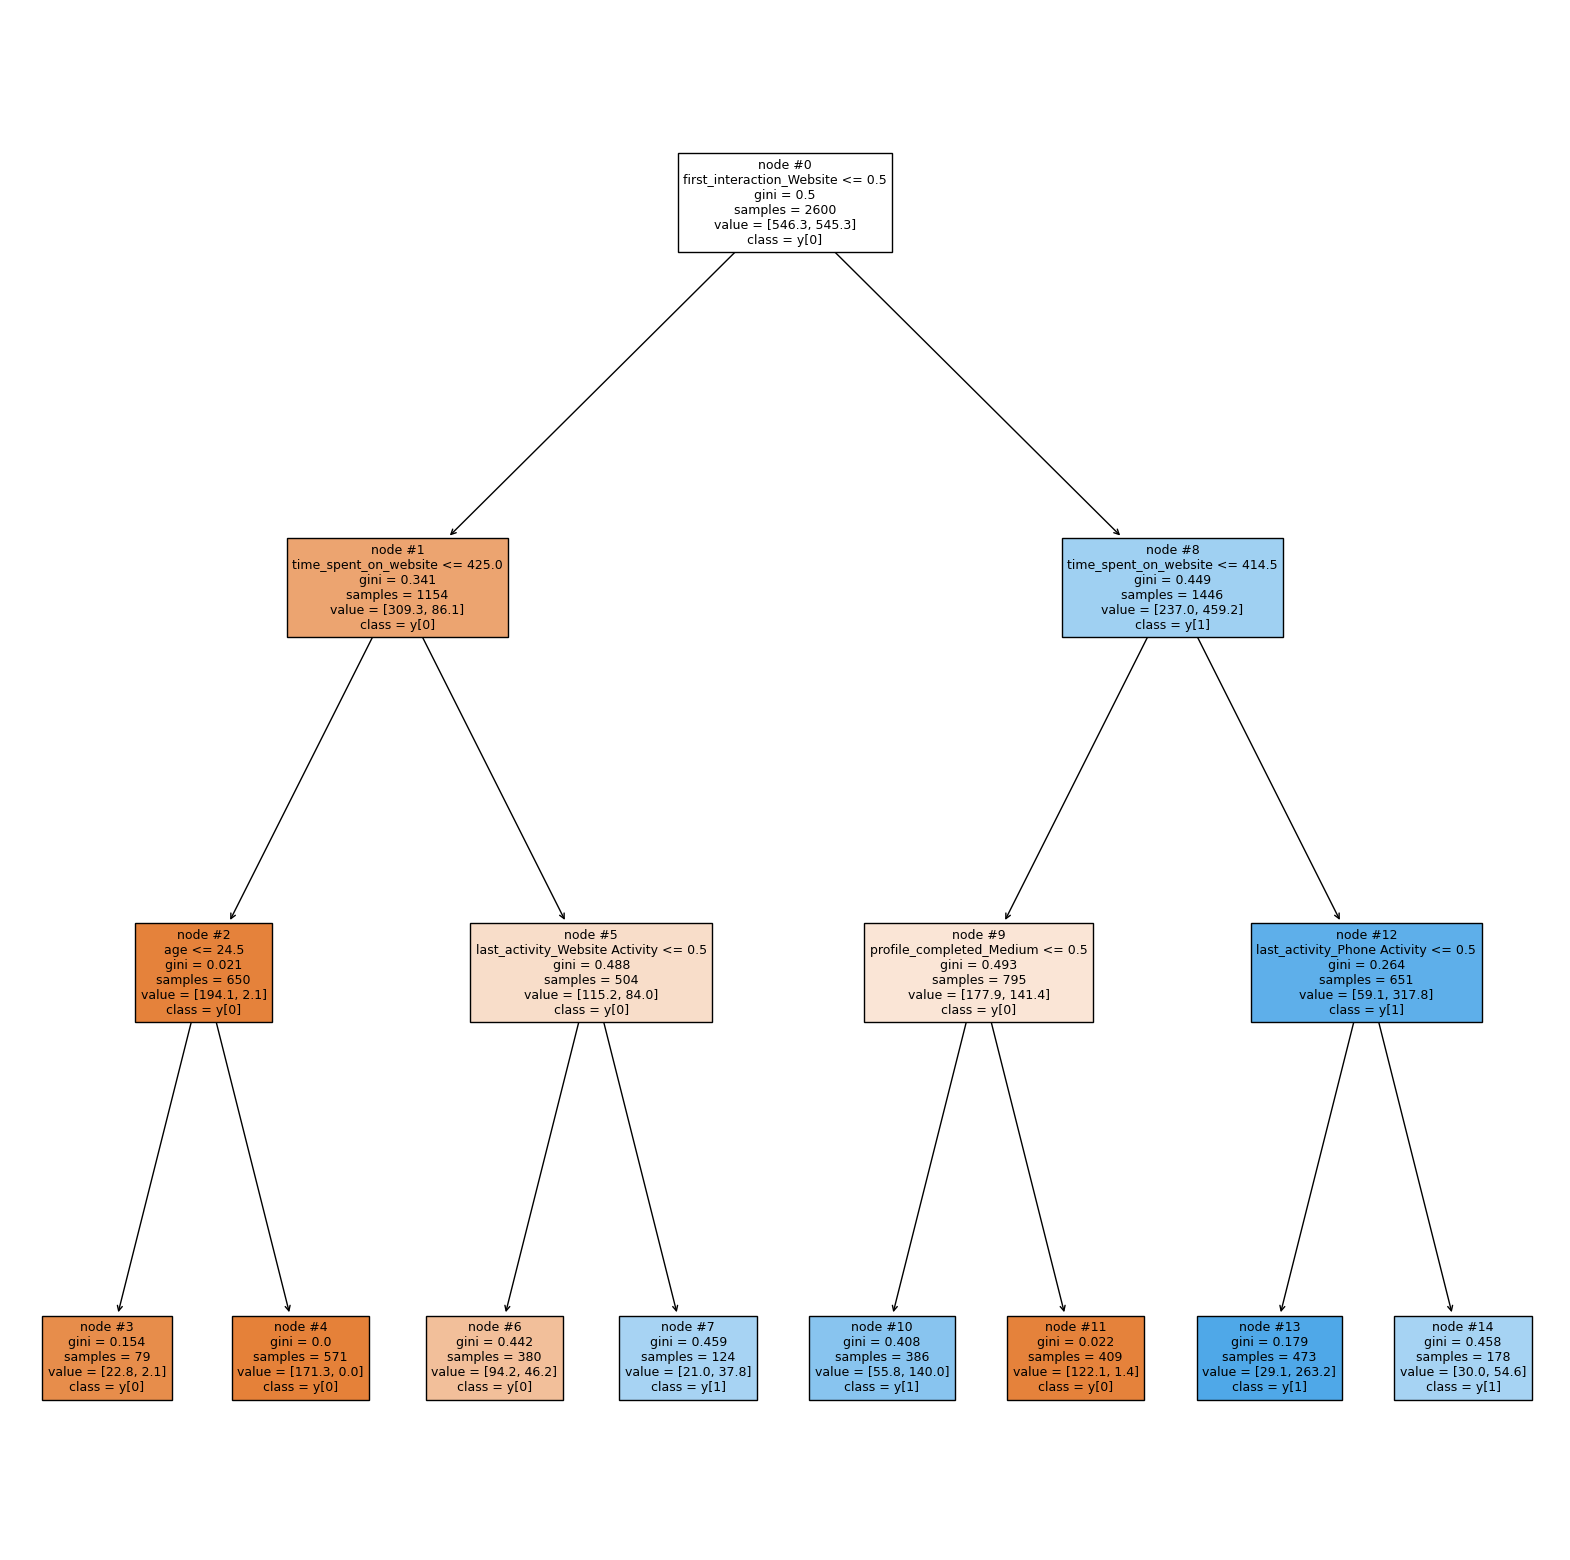

In [149]:
#plot the tree for the model
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

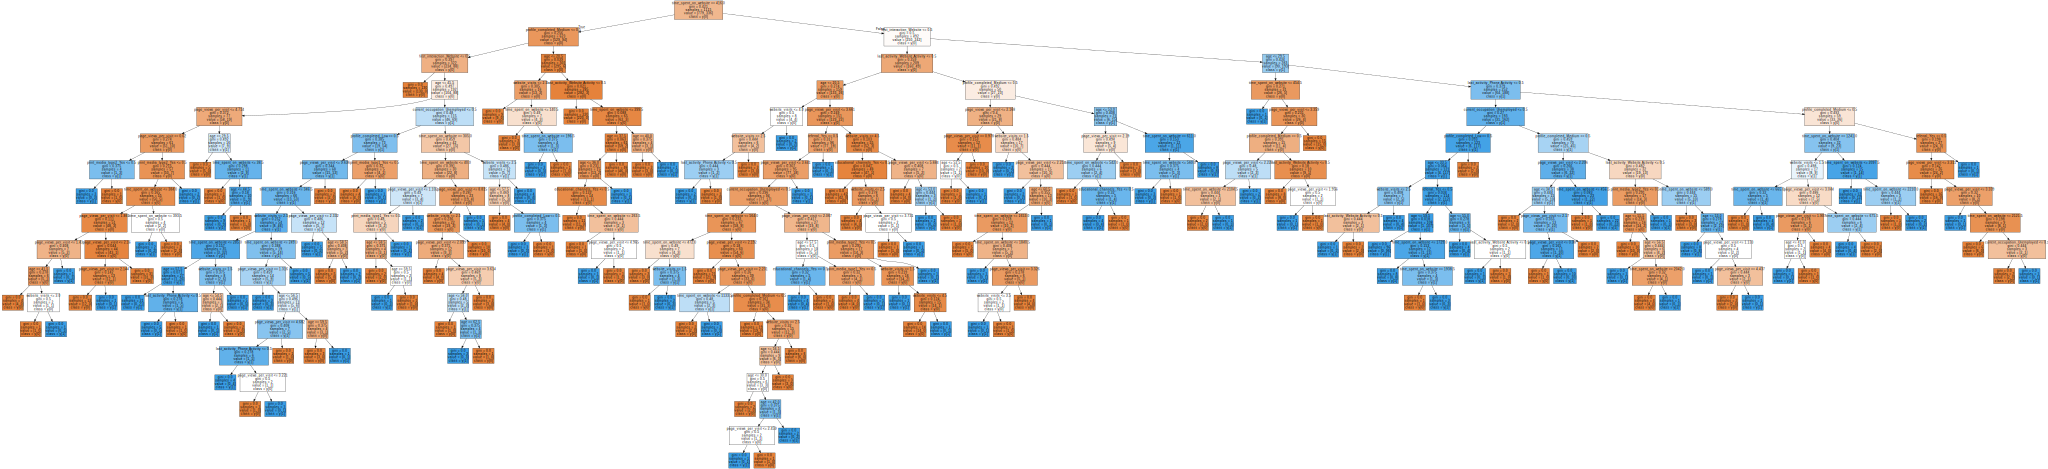

In [150]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names= features,
                                class_names= True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

**Observations:

- With 9 features, the model performs as well as the original. So Pruning is recomended

## Actionable Insights and Recommendations

**Observations:**
- With Random Forest we have created a model with elevated recall and overall good performance to predict leads likely to convert (~72% recall).

- Based on feature importance from classification as well as EDA, factors contributing to conversion seem to be:

  - Time spent on the website
  - Having one's first interaction through the website
  - Profile completeness at or above medium
- Followed by:
  - Professional activity (non-student)
  - Age (toward late career)
  - Referrals could be playing a role into the conversion decision.

- Based on these, leads most likely to convert are late-career professionals, employed or unemployed, who have engaged with and spent significant time on the website, and possibly completed their profile.

**Some Action :**

  - Deploying a more chatbot along with staffing more representatives will be helpful in conversion. Any investment / resources on improving the user experience of the website will imporve sales , lead conversion

  - More leads are generated from magazines than from newspaper or digital media, relocation of budgets will be helpful in conversion

  - Leads from referrals have the highest rate of conversion, ioncentivising referals with discounts or store coupons or gifts will be ideal

  -Target advertising / referal at the demographics of tending to higher conversion, ie. late-career professionals looking to upskill or reskill.
  
  - Incentivize profile completion, for example by reducing friction through a personal questionnaire (wizard), or by offering rewards.

  - Conduct further analysis into how advertising and advertising channels impact conversion. Imporve sample data quality